
# <center> <a href="https://www.rug.nl/ggdc/productivity/pwt/">Working with Penn World Tables (PWT)</a></center>

<center><a href="https://www.rug.nl/ggdc/productivity/pwt/"> <img src="https://raw.githubusercontent.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/main/pics/pwt_logo.png" alt="PWT" width=300/></a>  </center>

* PWT is a database with information on relative levels of income, output, input and productivity, covering 183 countries between 1950 and 2019. 

* Widely used for analysis

* Free and easy to access

* Includes variables not available in many other databases, capital stocks, total factor productivities, price indices, etc.

* If you check [their website](https://www.rug.nl/ggdc/productivity/pwt/) you can see more information on them, also identify and search the variables you may want to focus on. 

# Setup

# Import Modules and set Paths

In [1]:
# Basic Packages
from __future__ import division
import os
from datetime import datetime

# Web & file access
import requests
import io

# Import display options for showing websites
from IPython.display import IFrame, HTML

In [2]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%pylab --no-import-all
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")

import plotly.express as px
import plotly.graph_objects as go

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# Next line can import all of plotnine, but may overwrite things? Better import each function/object you need
#from plotnine import *

Using matplotlib backend: <object object at 0x184804430>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# Data
import pandas as pd
import numpy as np
from pandas_datareader import data, wb

# GIS & maps
import geopandas as gpd
gp = gpd
import georasters as gr
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import textwrap

In [4]:
# Data Munging
from itertools import product, combinations
import difflib
import pycountry
import geocoder
from geonamescache.mappers import country
mapper = country(from_key='name', to_key='iso3')
mapper2 = country(from_key='iso3', to_key='iso')
mapper3 = country(from_key='iso3', to_key='name')

# Regressions
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer, LineLocation

In [5]:
# Paths
pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [20]:
currentYear = datetime.now().year
year = min(2020, currentYear-3)

# Getting PWT data

# Downloading the data

## PWT has an online data access tool

* Useful to see which variables there are
* May not be most efficient way to get data
* Great to see which variables are there (see below)

In [9]:
url = 'https://febpwt.webhosting.rug.nl/Dmn/AggregateXs/SelectInit'
IFrame(url, width=800, height=400)

## Download the whole PWT dataset directly (it is a much smaller dataset than WDI)

* There are Stata and Excel versions, we will work with the Stata file 
    * Download data into dataframe `pwt`
    * Get labels so we know what variable each column is `pwt_labels`
```python
pwt_version = '100'
pwt = pd.read_stata('https://www.rug.nl/ggdc/docs/pwt' + pwt_version + '.dta')
pwt_labels = pd.io.stata.StataReader('https://www.rug.nl/ggdc/docs/pwt' + pwt_version + '.dta').variable_labels()
```

In [12]:
pwt_version = '100'
pwt = pd.read_stata('https://www.rug.nl/ggdc/docs/pwt' + pwt_version + '.dta')
pwt_labels = pd.io.stata.StataReader('https://www.rug.nl/ggdc/docs/pwt' + pwt_version + '.dta').variable_labels()

In [13]:
pwt.head()

countrycode country   currency_unit  year  rgdpe  rgdpo  pop  emp  avh  hc  ...  csh_x  csh_m  csh_r  pl_c  pl_i  pl_g  pl_x  pl_m  pl_n  pl_k
0         ABW   Aruba  Aruban Guilder  1950    NaN    NaN  NaN  NaN  NaN NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
1         ABW   Aruba  Aruban Guilder  1951    NaN    NaN  NaN  NaN  NaN NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2         ABW   Aruba  Aruban Guilder  1952    NaN    NaN  NaN  NaN  NaN NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
3         ABW   Aruba  Aruban Guilder  1953    NaN    NaN  NaN  NaN  NaN NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
4         ABW   Aruba  Aruban Guilder  1954    NaN    NaN  NaN  NaN  NaN NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

[5 rows x 52 columns]

In [14]:
pwt_labels

{'countrycode': '3-letter ISO country code',
 'country': 'Country name',
 'currency_unit': 'Currency unit',
 'year': 'Year',
 'rgdpe': 'Expenditure-side real GDP at chained PPPs (in mil. 2017US$)',
 'rgdpo': 'Output-side real GDP at chained PPPs (in mil. 2017US$)',
 'pop': 'Population (in millions)',
 'emp': 'Number of persons engaged (in millions)',
 'avh': 'Average annual hours worked by persons engaged (source: The Conference Board)',
 'hc': 'Human capital index, see note hc',
 'ccon': 'Real consumption of households and government, at current PPPs (in mil. 2017US$)',
 'cda': 'Real domestic absorption, see note cda',
 'cgdpe': 'Expenditure-side real GDP at current PPPs (in mil. 2017US$)',
 'cgdpo': 'Output-side real GDP at current PPPs (in mil. 2017US$)',
 'cn': 'Capital stock at current PPPs (in mil. 2017US$)',
 'ck': 'Capital services levels at current PPPs (USA=1)',
 'ctfp': 'TFP level at current PPPs (USA=1)',
 'cwtfp': 'Welfare-relevant TFP levels at current PPPs (USA=1)',
 'rg

## Create some variables of interest

## Income per capita and its logarithm based on expenditures and outputs, i.e., the `rgdpe` and `rgdpo` variables

In [17]:
pwt['gdp_pc_e'] = pwt['rgdpe'] / pwt['pop']
pwt['gdp_pc_o'] = pwt['rgdpo'] / pwt['pop']
pwt['ln_gdp_pc_e'] = pwt['gdp_pc_e'].apply(np.log)
pwt['ln_gdp_pc_o'] = pwt['gdp_pc_o'].apply(np.log)
pwt['ln_pop'] = pwt['pop'].apply(np.log)

## Add some additional data to identify country groups, regions, etc.

In [33]:
wbcountries = wb.get_countries()
wbcountries['name'] = wbcountries.name.str.strip()
wbcountries = wbcountries.loc[wbcountries.region.isin(['Aggregates'])==False].reset_index(drop=True)
wbcountries['incomeLevel'] = wbcountries['incomeLevel'].str.title()
wbcountries.loc[wbcountries.iso3c=='VEN', 'incomeLevel'] = 'Upper Middle Income'

In [34]:
df = pwt.merge(wbcountries, left_on='countrycode', right_on='iso3c')
df.head()

countrycode country   currency_unit  year  rgdpe  rgdpo  pop  emp  avh  hc  ...  iso3c  iso2c   name                      region  adminregion  incomeLevel     lendingType  \
0         ABW   Aruba  Aruban Guilder  1950    NaN    NaN  NaN  NaN  NaN NaN  ...    ABW     AW  Aruba  Latin America & Caribbean                High Income  Not classified   
1         ABW   Aruba  Aruban Guilder  1951    NaN    NaN  NaN  NaN  NaN NaN  ...    ABW     AW  Aruba  Latin America & Caribbean                High Income  Not classified   
2         ABW   Aruba  Aruban Guilder  1952    NaN    NaN  NaN  NaN  NaN NaN  ...    ABW     AW  Aruba  Latin America & Caribbean                High Income  Not classified   
3         ABW   Aruba  Aruban Guilder  1953    NaN    NaN  NaN  NaN  NaN NaN  ...    ABW     AW  Aruba  Latin America & Caribbean                High Income  Not classified   
4         ABW   Aruba  Aruban Guilder  1954    NaN    NaN  NaN  NaN  NaN NaN  ...    ABW     AW  Aruba  Latin America & Caribbean                High Income  Not classified   

   capitalCity  longitude  latitude  
0   Oranjestad   -70.0167   12.5167  
1   Oranjestad   -70.0167   12.5167  
2   Oranjestad   -70.0167   12.5167  
3   Oranjestad   -70.0167   12.5167  
4   Oranjestad   -70.0167   12.5167  

[5 rows x 67 columns]

# Regression Analysis with 
<center><a href="statsmodels"><img src="https://www.statsmodels.org/stable/_images/statsmodels-logo-v2-horizontal.svg" alt="statsmodels" width=300/></a></center>

In [16]:
url = 'https://www.statsmodels.org/stable/index.html'
IFrame(url, width=800, height=400)

## Linear Regressions using OLS 

It is very easy to run a regression in **statsmodels**. 

We only need

* Data in a **pandas** dataframe

* An equation we want to estimate

Equations are strings of the form 
```python
'dependent_variable ~ indep_var_1 + function(indep_var2) + C(indep_var3)'
```

where:
* `dependent_variable` is the outcome variable of interest
* `indep_var_1` is the first independent variable        
* `function(indep_var2)` is a function of another independent variable (if needed)      
* `C(indep_var3)` defines fixed-effects/dummies based on categories given in indep_var3

## Simple Regression of Log[GDP pc] and Log[Population]

In [47]:
dffig = df.loc[df.year==year]\
            .dropna(subset=['ln_gdp_pc_o', 'ln_gdp_pc_e', 'ln_pop'])\
            .sort_values(by=['region', 'iso3c']).reset_index(drop=True)
dffig.head()

countrycode               country      currency_unit  year         rgdpe         rgdpo          pop         emp          avh        hc  ...  iso3c  iso2c                  name  \
0         AUS             Australia  Australian Dollar  2019  1.280843e+06  1.364678e+06    25.203198   12.863174  1726.797659  3.549666  ...    AUS     AU             Australia   
1         BRN     Brunei Darussalam      Brunei Dollar  2019  2.927074e+04  3.173777e+04     0.433285    0.222358          NaN  2.798208  ...    BRN     BN     Brunei Darussalam   
2         CHN                 China      Yuan Renminbi  2019  2.005607e+07  2.025766e+07  1433.783686  798.807739  2168.918848  2.698987  ...    CHN     CN                 China   
3         FJI                  Fiji        Fiji Dollar  2019  1.223546e+04  1.224018e+04     0.889953    0.308248          NaN  2.701598  ...    FJI     FJ                  Fiji   
4         HKG  China, Hong Kong SAR   Hong Kong Dollar  2019  4.405543e+05  4.075758e+05     7.436154    3.863810  2147.574362  3.267884  ...    HKG     HK  Hong Kong SAR, China   

                region                                  adminregion          incomeLevel     lendingType          capitalCity  longitude  latitude  
0  East Asia & Pacific                                                       High Income  Not classified             Canberra    149.129 -35.28200  
1  East Asia & Pacific                                                       High Income  Not classified  Bandar Seri Begawan    114.946   4.94199  
2  East Asia & Pacific  East Asia & Pacific (excluding high income)  Upper Middle Income            IBRD              Beijing    116.286  40.04950  
3  East Asia & Pacific  East Asia & Pacific (excluding high income)  Upper Middle Income           Blend                 Suva    178.399 -18.11490  
4  East Asia & Pacific                                                       High Income  Not classified                         114.109  22.39640  

[5 rows x 67 columns]

## Simple Regression of Log[GDP pc] (Output based GDP) and Log[Population]

In [71]:
mod = smf.ols(formula='ln_gdp_pc_o ~ ln_pop', data=dffig, missing='drop').fit()

In [72]:
mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.040   
Dependent Variable: ln_gdp_pc_o      AIC:                567.8946
Date:               2022-10-22 12:54 BIC:                574.2916
No. Observations:   181              Log-Likelihood:     -281.95 
Df Model:           1                F-statistic:        8.515   
Df Residuals:       179              Prob (F-statistic): 0.00397 
R-squared:          0.045            Scale:              1.3347  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      9.6874    0.1176  82.4012  0.0000   9.4554   9.9194
ln_pop        -0.1201    0.0412  -2.9181  0.0040  -0.2013  -0.0389
-----------------------------------------------------------------
Omnibus:               6.398        Durbin-Watson:          1.102
Prob(Omnibus):         0.041        Jarque-Bera (JB):       6.582
Skew:                  -0.447       Prob(JB):               0.037
Kurtosis:              2.727        Condition No.:          4    
=================================================================

"""

## Plot Data and OLS Regression Predictions

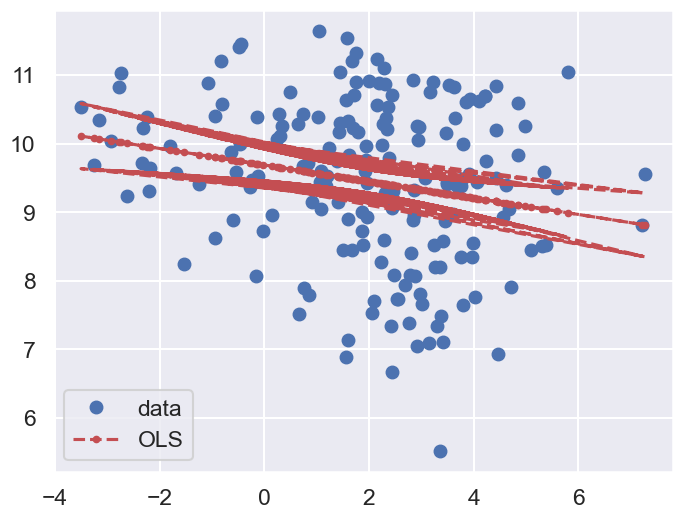

In [73]:
pred_ols = mod.get_prediction()
iv_l = pred_ols.summary_frame()["mean_ci_lower"]
iv_u = pred_ols.summary_frame()["mean_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(dffig.ln_pop, dffig.ln_gdp_pc_o, "o", label="data")
ax.plot(dffig.ln_pop, mod.fittedvalues, "r--.", label="OLS")
ax.plot(dffig.ln_pop, iv_u, "r--")
ax.plot(dffig.ln_pop, iv_l, "r--")
ax.legend(loc="best")

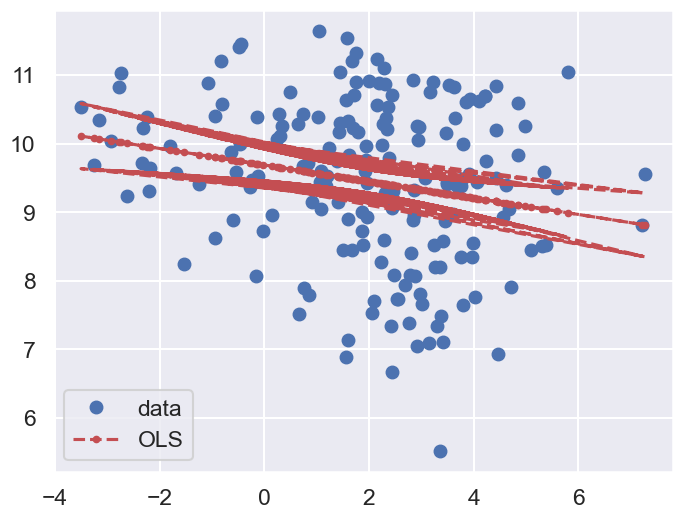

In [74]:
fig

## Simple Regression of Log[GDP pc] and Log[Population] accounting for WB region dummies

In [75]:
mod2 = smf.ols(formula='ln_gdp_pc_o ~ ln_pop + C(region)', data=dffig, missing='drop').fit()

In [76]:
mod2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                      OLS                     Adj. R-squared:            0.521   
Dependent Variable:         ln_gdp_pc_o             AIC:                       447.7784
Date:                       2022-10-22 12:54        BIC:                       473.3663
No. Observations:           181                     Log-Likelihood:            -215.89 
Df Model:                   7                       F-statistic:               29.01   
Df Residuals:               173                     Prob (F-statistic):        3.29e-26
R-squared:                  0.540                   Scale:                     0.66554 
---------------------------------------------------------------------------------------
                                         Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------------
Intercept                               10.4101   0.2046 50.8770 0.0000 10.0062 10.8139
C(region)[T.Europe & Central Asia]       0.1364   0.2188  0.6235 0.5338 -0.2955  0.5683
C(region)[T.Latin America & Caribbean ] -0.8560   0.2379 -3.5975 0.0004 -1.3257 -0.3864
C(region)[T.Middle East & North Africa] -0.3038   0.2587 -1.1740 0.2420 -0.8145  0.2069
C(region)[T.North America]               0.7945   0.5056  1.5714 0.1179 -0.2034  1.7925
C(region)[T.South Asia]                 -0.9878   0.3585 -2.7558 0.0065 -1.6954 -0.2803
C(region)[T.Sub-Saharan Africa ]        -1.9416   0.2205 -8.8053 0.0000 -2.3769 -1.5064
ln_pop                                  -0.1395   0.0315 -4.4284 0.0000 -0.2016 -0.0773
---------------------------------------------------------------------------------------
Omnibus:                      18.066              Durbin-Watson:                 2.193 
Prob(Omnibus):                0.000               Jarque-Bera (JB):              25.795
Skew:                         -0.596              Prob(JB):                      0.000 
Kurtosis:                     4.413               Condition No.:                 28    
=======================================================================================

"""

## Simple Regression of Log[GDP pc] (Expenditure based GDP) and Log[Population]

In [77]:
mod3 = smf.ols(formula='ln_gdp_pc_e ~ ln_pop', data=dffig, missing='drop').fit()

In [78]:
mod3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.054   
Dependent Variable: ln_gdp_pc_e      AIC:                575.4043
Date:               2022-10-22 12:54 BIC:                581.8013
No. Observations:   181              Log-Likelihood:     -285.70 
Df Model:           1                F-statistic:        11.32   
Df Residuals:       179              Prob (F-statistic): 0.000936
R-squared:          0.059            Scale:              1.3912  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      9.7442    0.1200  81.1826  0.0000   9.5074   9.9811
ln_pop        -0.1414    0.0420  -3.3651  0.0009  -0.2243  -0.0585
-----------------------------------------------------------------
Omnibus:               6.829        Durbin-Watson:          1.104
Prob(Omnibus):         0.033        Jarque-Bera (JB):       6.872
Skew:                  -0.443       Prob(JB):               0.032
Kurtosis:              2.646        Condition No.:          4    
=================================================================

"""

## Simple Regression of Log[GDP pc] (Expenditure based GDP) and Log[Population], accounting for WB region dummies

In [79]:
mod4 = smf.ols(formula='ln_gdp_pc_e ~ ln_pop + C(region)', data=dffig, missing='drop').fit()

In [80]:
mod4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                      OLS                     Adj. R-squared:            0.529   
Dependent Variable:         ln_gdp_pc_e             AIC:                       455.0410
Date:                       2022-10-22 12:54        BIC:                       480.6289
No. Observations:           181                     Log-Likelihood:            -219.52 
Df Model:                   7                       F-statistic:               29.88   
Df Residuals:               173                     Prob (F-statistic):        8.36e-27
R-squared:                  0.547                   Scale:                     0.69279 
---------------------------------------------------------------------------------------
                                         Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------------
Intercept                               10.4728   0.2088 50.1668 0.0000 10.0607 10.8848
C(region)[T.Europe & Central Asia]       0.1374   0.2233  0.6153 0.5392 -0.3033  0.5780
C(region)[T.Latin America & Caribbean ] -0.8396   0.2428 -3.4583 0.0007 -1.3187 -0.3604
C(region)[T.Middle East & North Africa] -0.3478   0.2640 -1.3174 0.1895 -0.8688  0.1733
C(region)[T.North America]               0.9288   0.5159  1.8004 0.0735 -0.0894  1.9470
C(region)[T.South Asia]                 -1.0378   0.3657 -2.8376 0.0051 -1.7596 -0.3159
C(region)[T.Sub-Saharan Africa ]        -1.9820   0.2250 -8.8099 0.0000 -2.4261 -1.5380
ln_pop                                  -0.1582   0.0321 -4.9236 0.0000 -0.2216 -0.0948
---------------------------------------------------------------------------------------
Omnibus:                      19.130              Durbin-Watson:                 2.191 
Prob(Omnibus):                0.000               Jarque-Bera (JB):              25.889
Skew:                         -0.653              Prob(JB):                      0.000 
Kurtosis:                     4.314               Condition No.:                 28    
=======================================================================================

"""

# Producing a nice table with **stargazer**

In [81]:
url = 'https://nbviewer.org/github/mwburke/stargazer/blob/master/examples.ipynb'
IFrame(url, width=800, height=400)

## Add the estimated models to **Stargazer**

In [104]:
stargazer = Stargazer([mod, mod2, mod3, mod4])

In [105]:
stargazer.significant_digits(2)
stargazer.show_degrees_of_freedom(False)
stargazer.dep_var_name = 'Dependent Variable:'
stargazer.dependent_variable = ' Log[GDP per capita (' + str(year) + ')]'
stargazer.custom_columns(['Output Based GDP', 'Output Based GDP', 'Expenditure Based GDP', 'Expenditure Based GDP'], [1, 1, 1, 1])
#stargazer.show_model_numbers(False)
stargazer.rename_covariates({'ln_pop':'Log[Population]'}), 
stargazer.add_line('WB Region FE', ['No', 'Yes', 'No', 'Yes'], LineLocation.FOOTER_TOP)
stargazer.covariate_order(['ln_pop'])

In [106]:
stargazer

## To show the table
```python
HTML(stargazer.render_html())
```

In [88]:
HTML(stargazer.render_html())

## To export the table to another file

In [107]:
file_name = "table.html" #Include directory path if needed
html_file = open(pathgraphs + file_name, "w" ) #This will overwrite an existing file
html_file.write( stargazer.render_html() )
html_file.close()

In [108]:
url = pathgraphs + 'table.html'
url = 'https://smu-econ-growth.github.io/EconGrowthUG-Slides-Working-with-PWT/table.html'
IFrame(url, width=500, height=300)

# Plotting PWT data

## Many options
* Since the data is a **pandas** dataframe, we could just use its functions as [we did previously](./Intro-Data-Analysis-Pandas.ipynb)
* Use the **[seaborn](https://seaborn.pydata.org/index.html)** package
* Use the **[plotly](https://plotly.com/python/)** package
* Use the **[plotnine](https://plotnine.readthedocs.io/en/stable/)** package

# Plots with 
<center><a href="https://seaborn.pydata.org/index.html#"><img src="https://raw.githubusercontent.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/main/pics/logo-wide-lightbg.svg" alt="seaborn" width=300/></a></center>

In [109]:
url = 'https://seaborn.pydata.org/examples/index.html'
IFrame(url, width=800, height=400)

Let's create a [Scatterplot with varying point sizes and hues](https://seaborn.pydata.org/examples/scatter_bubbles.html) that plots the Log[Population] (expediture based) and Log[GDP per capita] of each country and uses its log-GDP per capita (output based) and the WB region in the last available year as the size and hue.

## Using [`relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

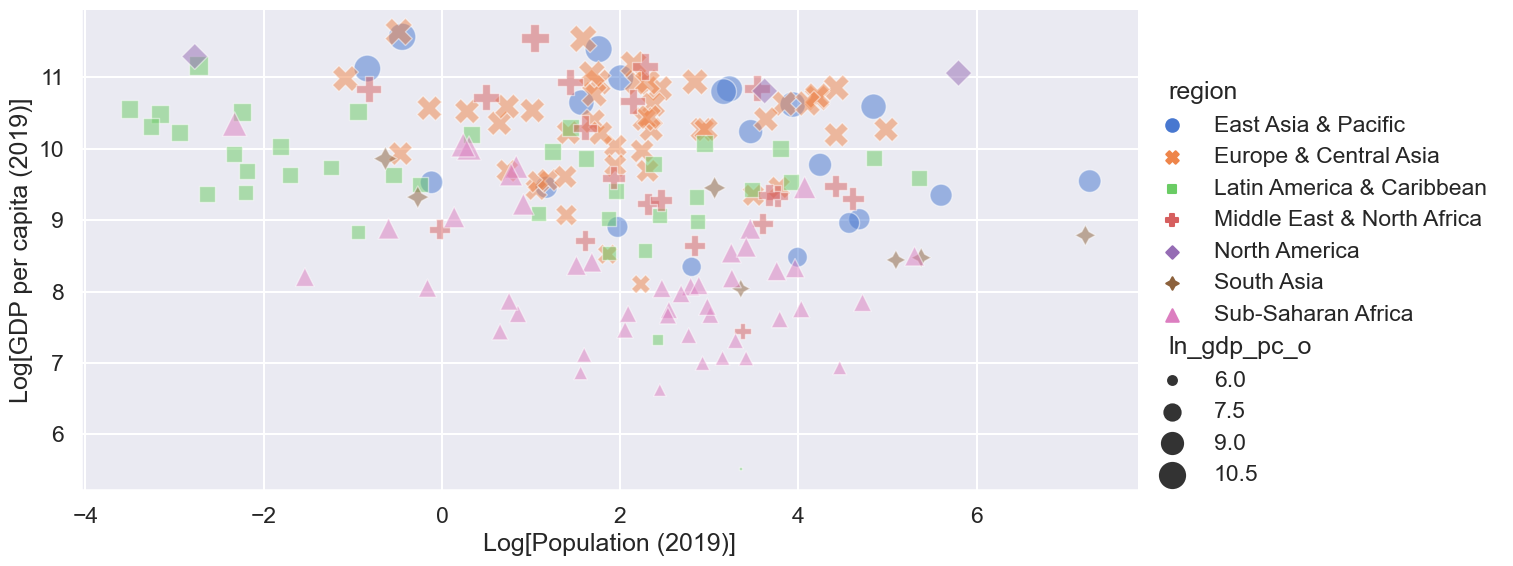

In [116]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")

g = sns.relplot(x="ln_pop", 
            y="ln_gdp_pc_e", 
            data=dffig,
            hue="region",
            hue_order = dffig.region.drop_duplicates().sort_values(),
            style="region",
            style_order = dffig.region.drop_duplicates().sort_values(),
            size="ln_gdp_pc_o",
            sizes=(10, 400), 
            alpha=.5, 
            height=6,
            aspect=2,
            palette="muted",
           )
g.set_axis_labels('Log[Population (' + str(year) + ')]', 'Log[GDP per capita (' + str(year) + ')]')

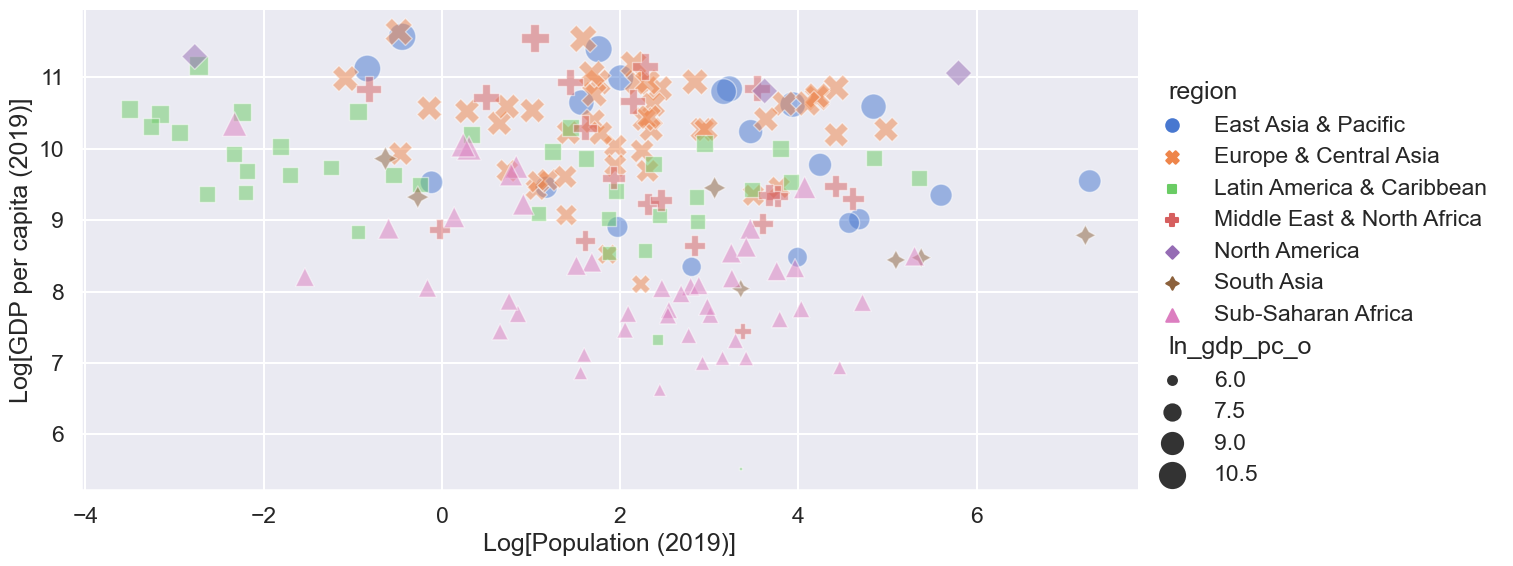

In [117]:
g.fig

# Using [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

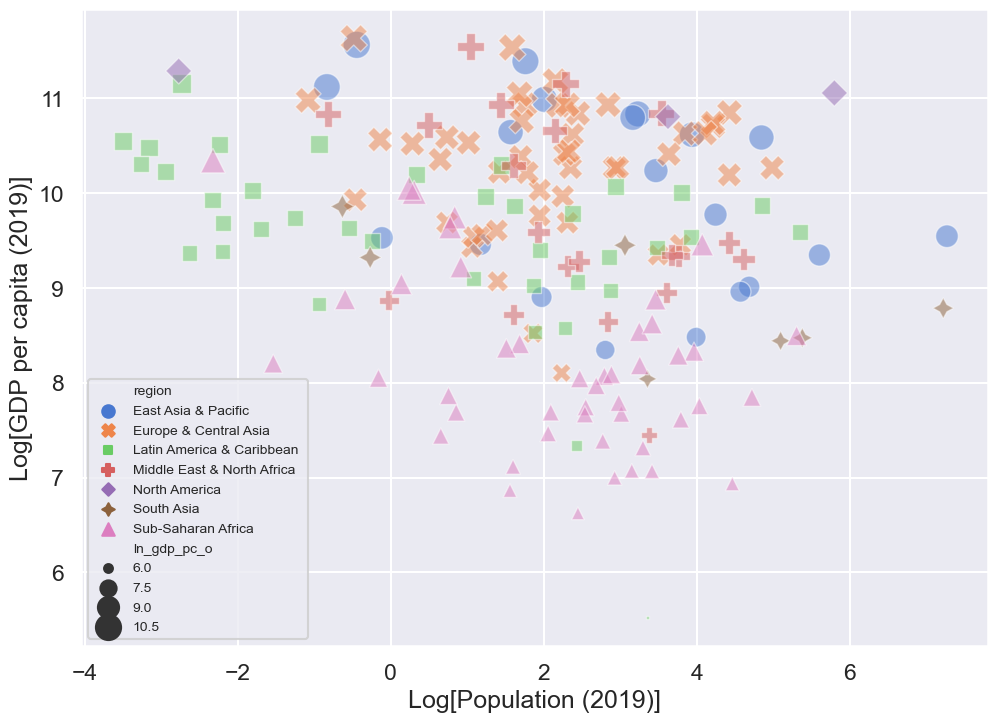

In [118]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")

fig, ax = plt.subplots()
sns.scatterplot(x="ln_pop", 
                y="ln_gdp_pc_e", 
                data=dffig,
                hue="region",
                hue_order = dffig.region.drop_duplicates().sort_values(),
                style="region",
                style_order = dffig.region.drop_duplicates().sort_values(),
                size="ln_gdp_pc_o",
                sizes=(10, 400), 
                alpha=.5, 
                palette="muted",
                ax=ax
               )
ax.set_xlabel('Log[Population (' + str(year) + ')]')
ax.set_ylabel('Log[GDP per capita (' + str(year) + ')]')
ax.legend(fontsize=10)

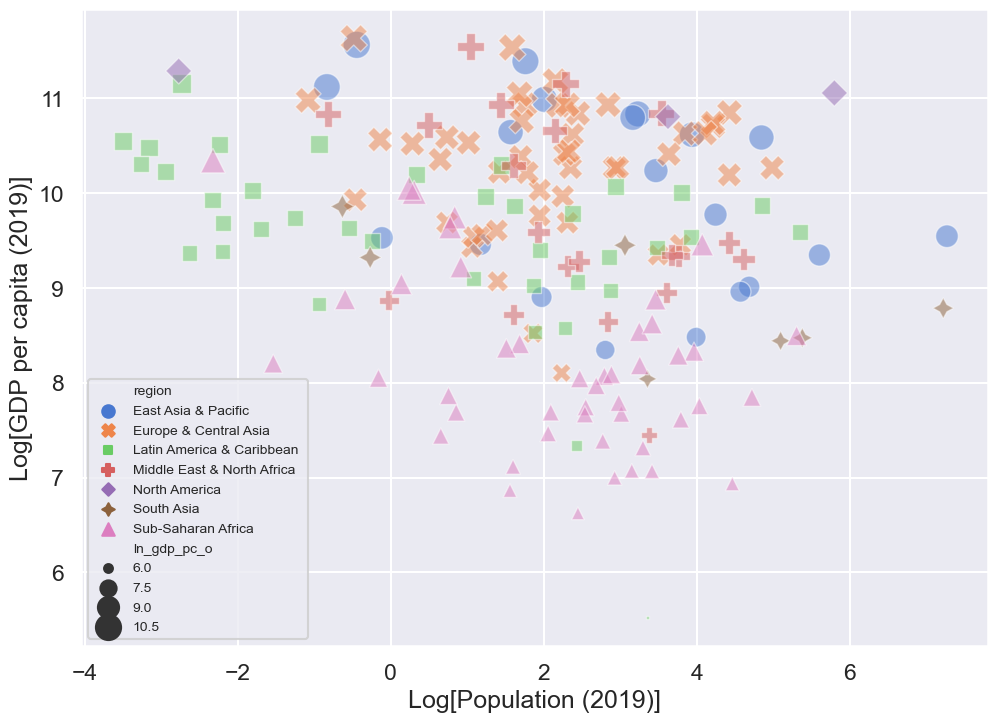

In [119]:
fig

# Based on **seaborn** we can create a useful functions that create plots for us
## E.g., scatter plots with labels, OLS regression lines, 45 degree lines, etc

In [127]:
def my_xy_plot(dfin, 
               x='ln_pop', 
               y='ln_gdp_pc_o', 
               labelvar='iso3c', 
               dx=0.006125, 
               dy=0.006125, 
               xlogscale=False, 
               ylogscale=False,
               xlabel='Log[Population ' +  str(year) + ']', 
               ylabel='Log[Income per capita in ' +  str(year) + ']',
               labels=False,
               xpct = False,
               ypct = False,
               OLS=False,
               OLSlinelabel='OLS',
               ssline=False,
               sslinelabel='45 Degree Line',
               filename='income-pop-growth.pdf',
               hue='region',
               hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                          'Latin America & Caribbean ', 'Middle East & North Africa',
                          'North America', 'South Asia', 'Sub-Saharan Africa '],
               style='incomeLevel', 
               style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
               palette=None,
               size=None,
               sizes=None,
               fontsize=10,
               label_font_size=12,
               save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels.
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.scatterplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    #hue='incomeLevel',
                    #hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    #hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                    #           'Latin America & Caribbean ', 'Middle East & North Africa',
                    #           'North America', 'South Asia', 'Sub-Saharan Africa '],
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                    size=size,
                    sizes=sizes,
                    #palette=sns.color_palette("Blues_r", df[hue].unique().shape[0]+6)[:df[hue].unique().shape[0]*2:2],
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_font_size, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!=hue) & (labels!=style) & (labels!=size)])
    labels = list(labels[(labels!=hue) & (labels!=style) & (labels!=size)])
    ax.legend(handles=handles, labels=labels, fontsize=fontsize)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

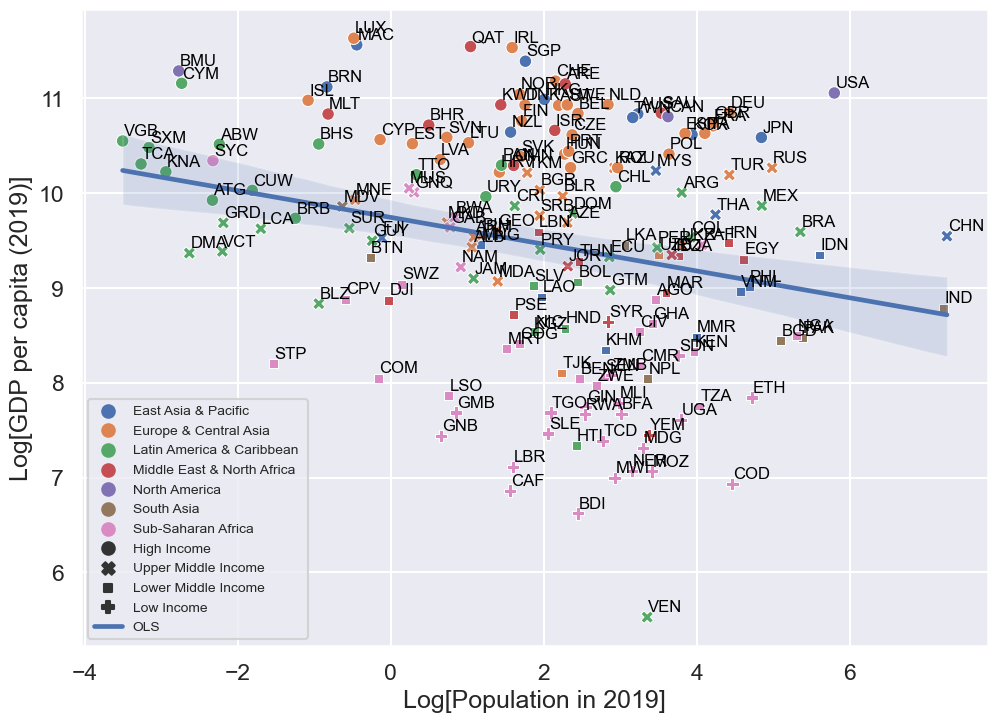

In [128]:
g = my_xy_plot(dffig, 
           x='ln_pop', 
           y='ln_gdp_pc_e', 
           xlabel='Log[Population in ' +  str(year) + ']', 
           ylabel='Log[GDP per capita (' + str(year) +')]', 
           OLS=True, 
           labels=True, 
           filename='ln-gdp-pc-pop-pwt.pdf')

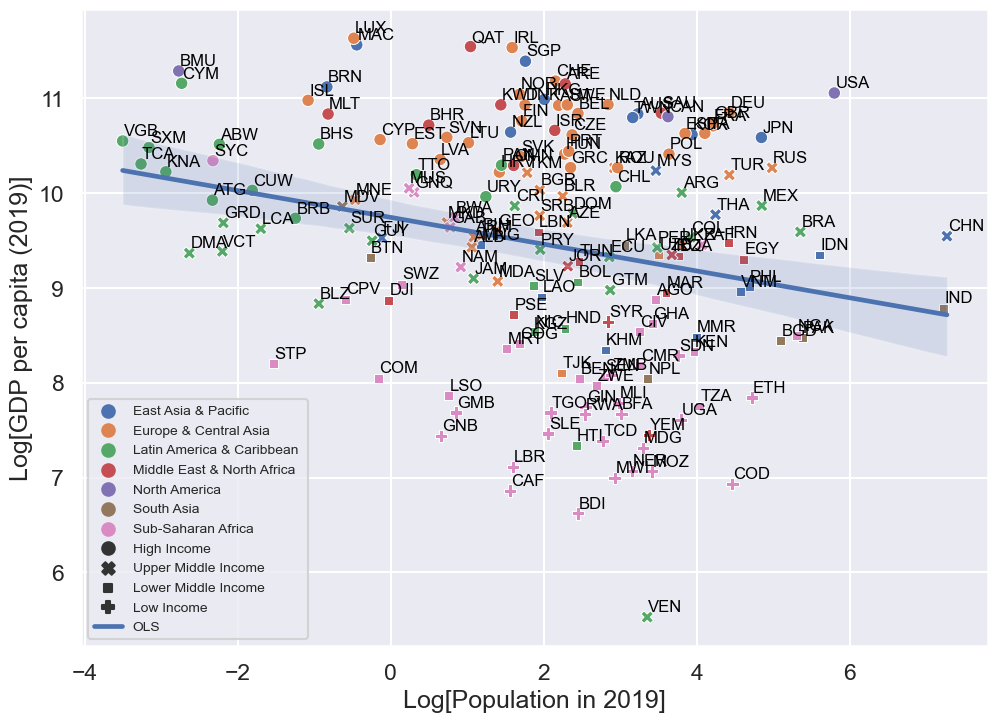

In [129]:
g

## Compare Both GDP per capita measures

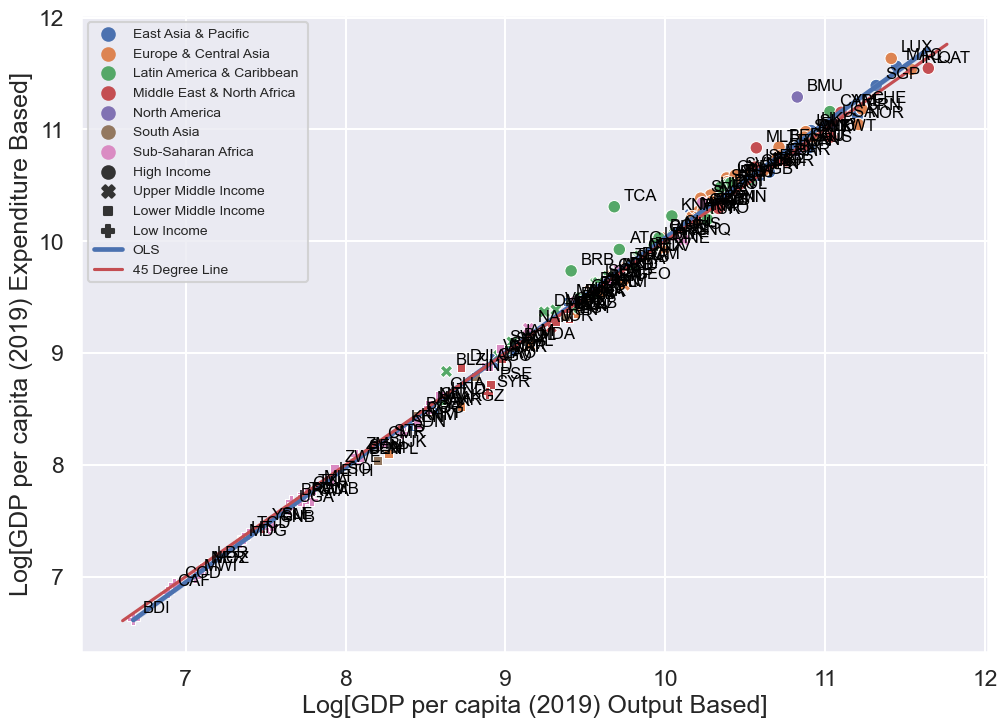

In [136]:
g = my_xy_plot(dffig.loc[dffig.iso3c!='VEN'], 
               x='ln_gdp_pc_o', 
               y='ln_gdp_pc_e', 
               xlabel='Log[GDP per capita (' + str(year) +') Output Based]', 
               ylabel='Log[GDP per capita (' + str(year) +') Expenditure Based]', 
               OLS=True,
               ssline=True,
               labels=True, 
               label_font_size=12,
               filename='ln-gdp-pc-out-exp.pdf')

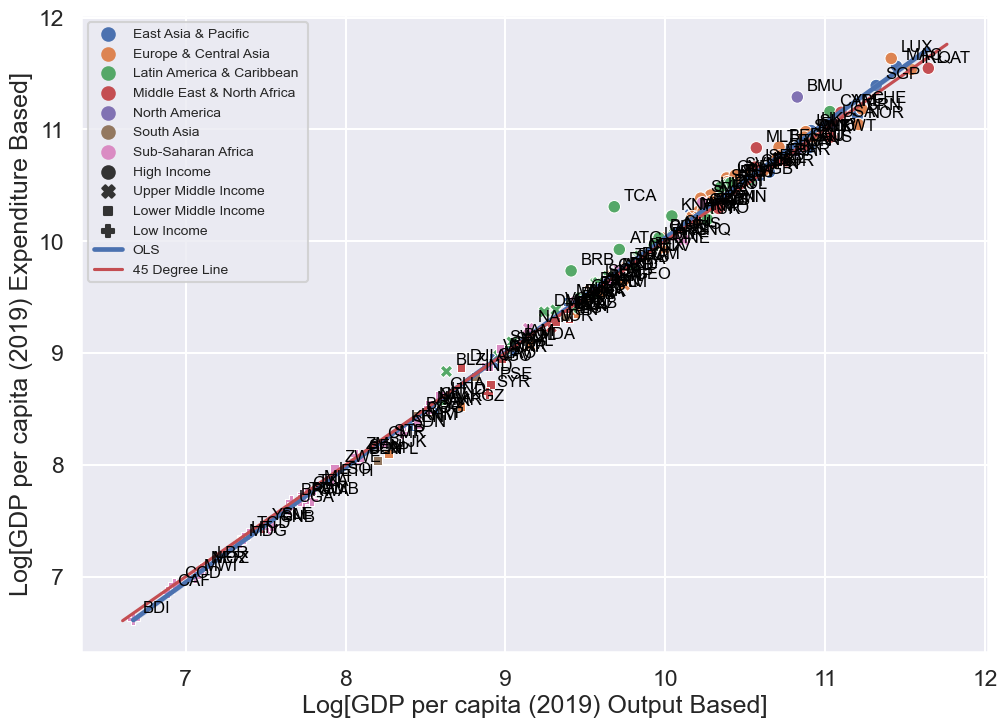

In [137]:
g

## Plot the evolution of variables across time by groups

In [138]:
def my_xy_line_plot(dfin, 
                    x='year', 
                    y='ln_gdp_pc_e', 
                    labelvar='iso3c', 
                    dx=0.006125, 
                    dy=0.006125, 
                    xlogscale=False, 
                    ylogscale=False,
                    xlabel='Growth Rate of Population', 
                    ylabel='Log[Income per capita in ' +  str(year) + ']',
                    labels=False,
                    xpct = False,
                    ypct = False,
                    OLS=False,
                    OLSlinelabel='OLS',
                    ssline=False,
                    sslinelabel='45 Degree Line',
                    filename='income-pop-growth.pdf',
                    hue='region',
                    hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                               'Latin America & Caribbean ', 'Middle East & North Africa',
                               'North America', 'South Asia', 'Sub-Saharan Africa '],
                    style='incomeLevel', 
                    style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    palette=None,
                    legend_fontsize=10,
                    label_font_size=12,
                    loc=None,
                    save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels. 
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.lineplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_fontsize, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!='region') & (labels!='incomeLevel')])
    labels = list(labels[(labels!='region') & (labels!='incomeLevel')])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize, loc=loc)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

## Log[GDP per capita across the world] by WB Income Groups

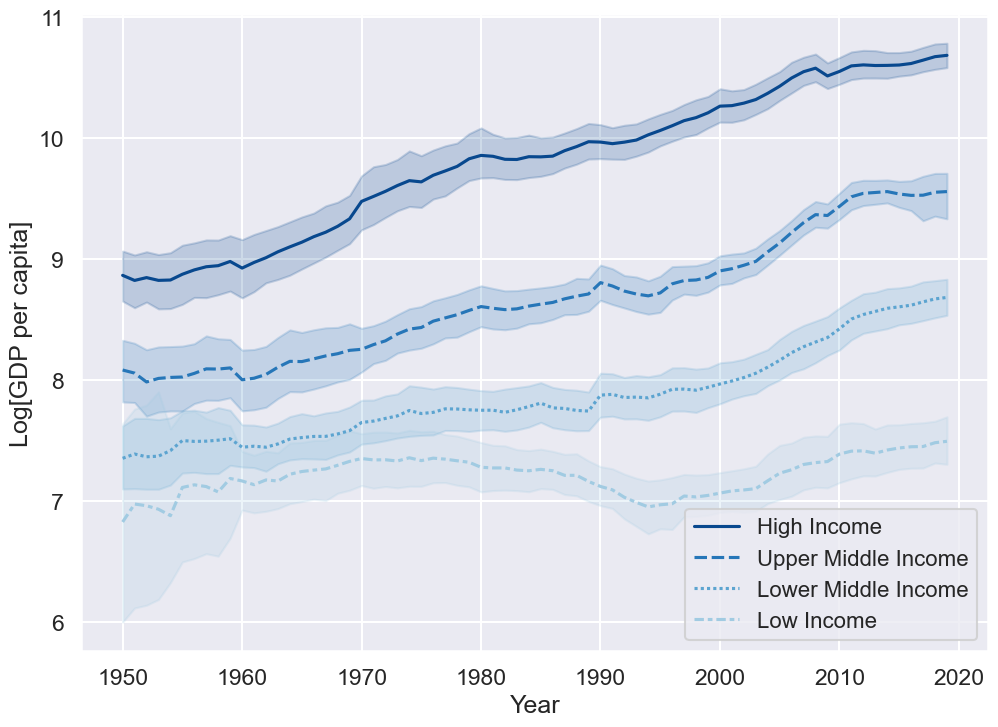

In [140]:
palette=sns.color_palette("Blues_r", df['incomeLevel'].unique().shape[0]+6)[:df['incomeLevel'].unique().shape[0]*2:2]
fig = my_xy_line_plot(df, 
                x='year', 
                y='ln_gdp_pc_e', 
                xlabel='Year',
                ylabel='Log[GDP per capita]',
                filename='ln-gdp-pc-income-groups-TS-pwt.pdf',
                hue='incomeLevel',
                hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                palette=palette,
                OLS=False, 
                labels=False,
                legend_fontsize=16,
                loc='lower right',
                save=True)

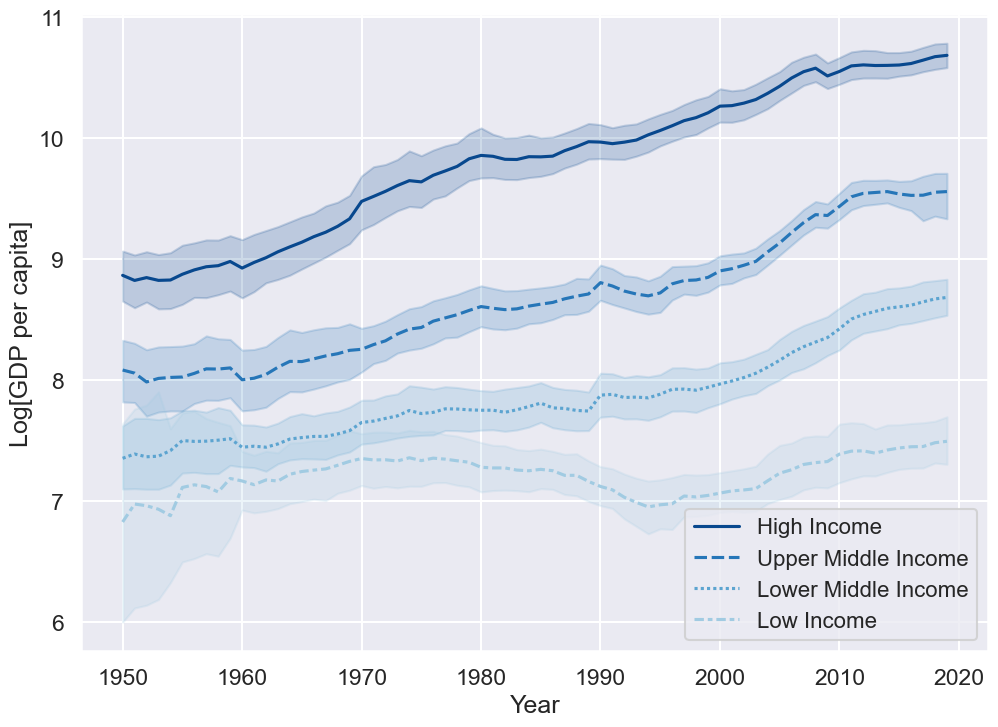

In [141]:
fig

## GDP per capita across the world by WB Regions

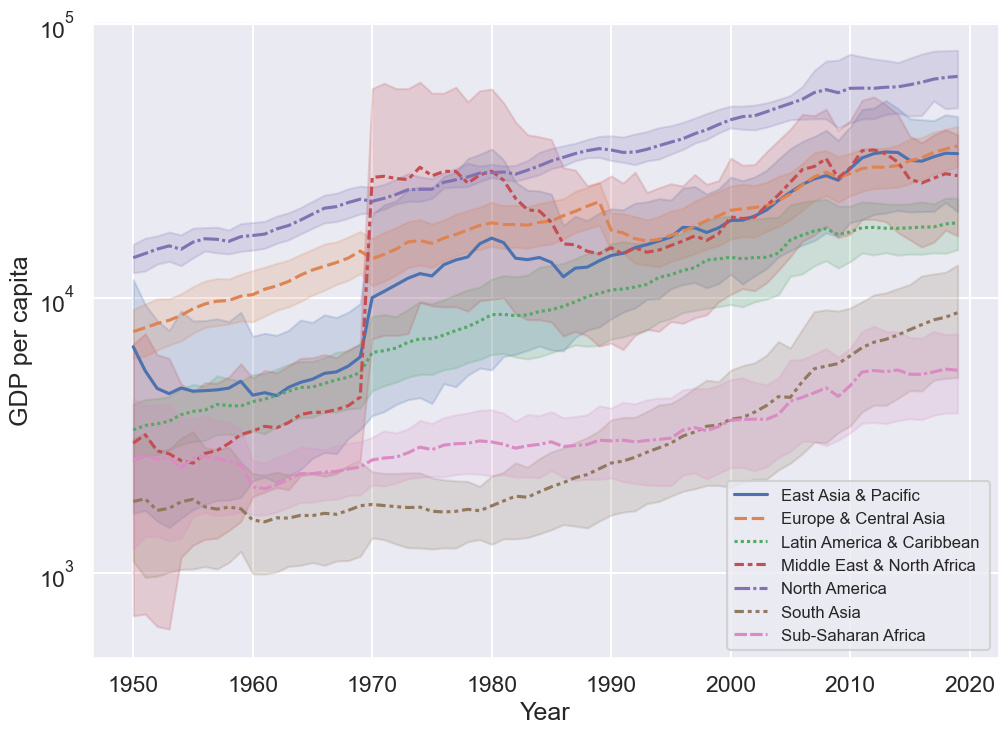

In [145]:
#palette=sns.color_palette("Blues_r", wdi['region'].unique().shape[0]+6)[:wdi['region'].unique().shape[0]*2:2]
fig = my_xy_line_plot(df, 
                      x='year', 
                      y='gdp_pc_e', 
                      xlabel='Year',
                      ylabel='GDP per capita',
                      ylogscale=True,
                      filename='ln-gdp-pc-regions-TS-pwt.pdf',
                      style='region',
                      style_order=['East Asia & Pacific', 'Europe & Central Asia',
                                   'Latin America & Caribbean ', 'Middle East & North Africa',
                                   'North America', 'South Asia', 'Sub-Saharan Africa '],
                      #palette=palette,
                      OLS=False, 
                      labels=False,
                      legend_fontsize=12,
                      loc='lower right',
                      save=True)

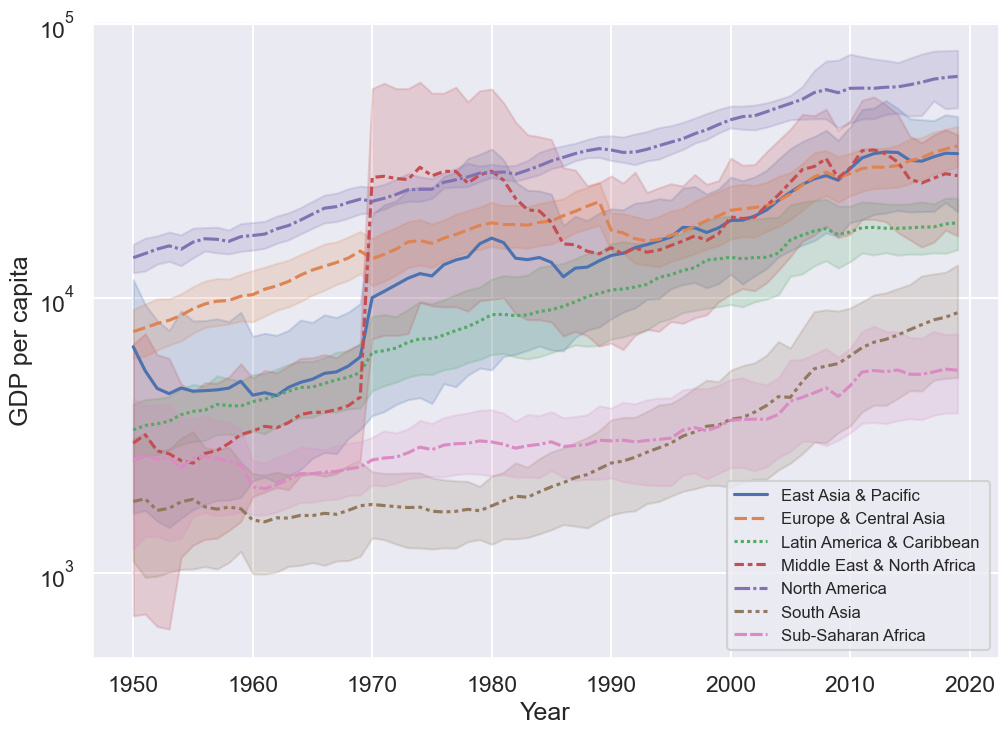

In [146]:
fig

# Plots with 
<center><a href="https://plotly.com/python/"><img src="https://raw.githubusercontent.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/main/pics/plot_ly-ar21.svg" alt="plotly express" width=300/></a></center>

In [147]:
url = 'https://plotly.com/python/'
IFrame(url, width=800, height=400)

## Let's [select symbols to plot](https://plotly.com/python/marker-style/) so it looks like the previous ones and also to improve visibility

In [153]:
symbols = ['circle', 'x', 'square', 'cross', 'diamond', 'star-diamond', 'triangle-up']
fig = px.scatter(dffig,
                 x="ln_pop", 
                 y="ln_gdp_pc_e", 
                 color='region',
                 symbol='region',
                 symbol_sequence=symbols,
                 hover_name='name',
                 hover_data=['iso3c', 'ln_pop', 'gdp_pc_o', 'gdp_pc_e'],
                 size='ln_gdp_pc_o',
                 size_max=15,
                 trendline="ols",
                 trendline_scope="overall",
                 trendline_color_override="black",
                 labels={
                     "ln_pop": "Log[Population (" + str(year) + ")]",
                     "ln_gdp_pc_o": "Log[GDP per capita (" + str(year) + ")] (Output Based)",
                     "ln_gdp_pc_e": "Log[GDP per capita (" + str(year) + ")] (Expenditure Based)",
                     "gdp_pc": "GDP per capita (" + str(year) + ")",
                     "region": "WB Region"
                 },
                 opacity=0.75,
                 height=800,
                )

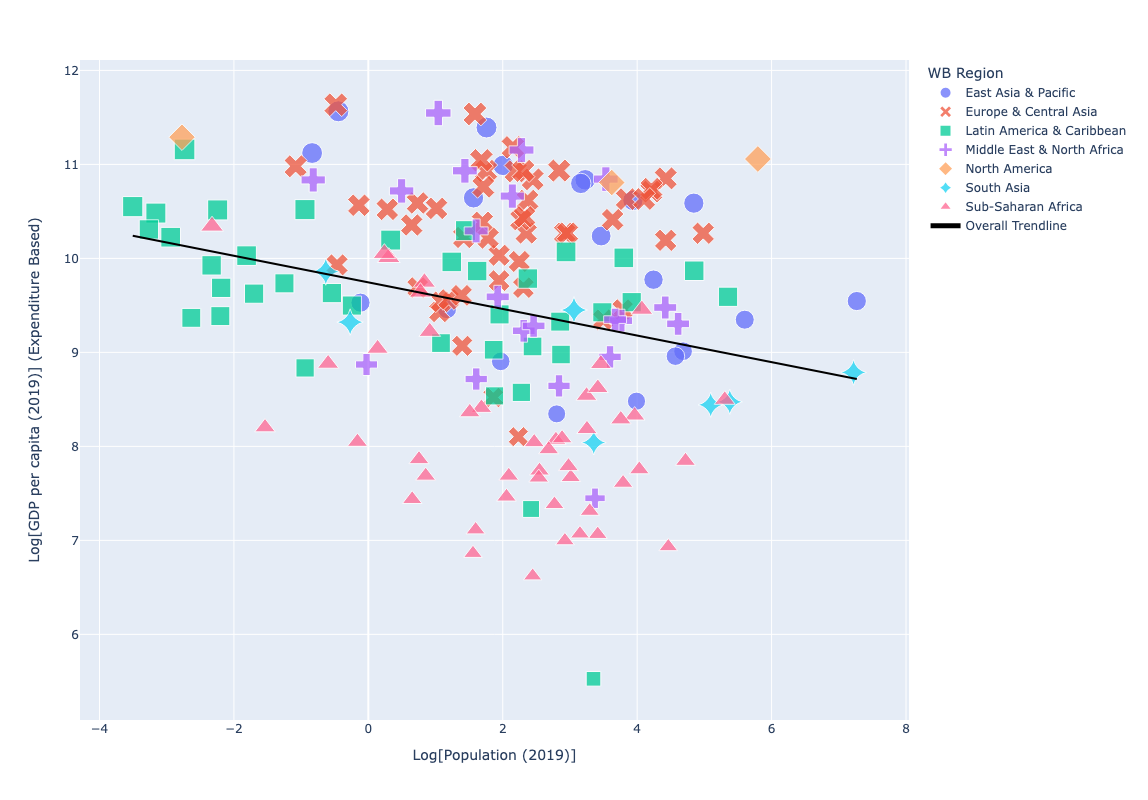

In [154]:
fig.show()

# Change marker borders

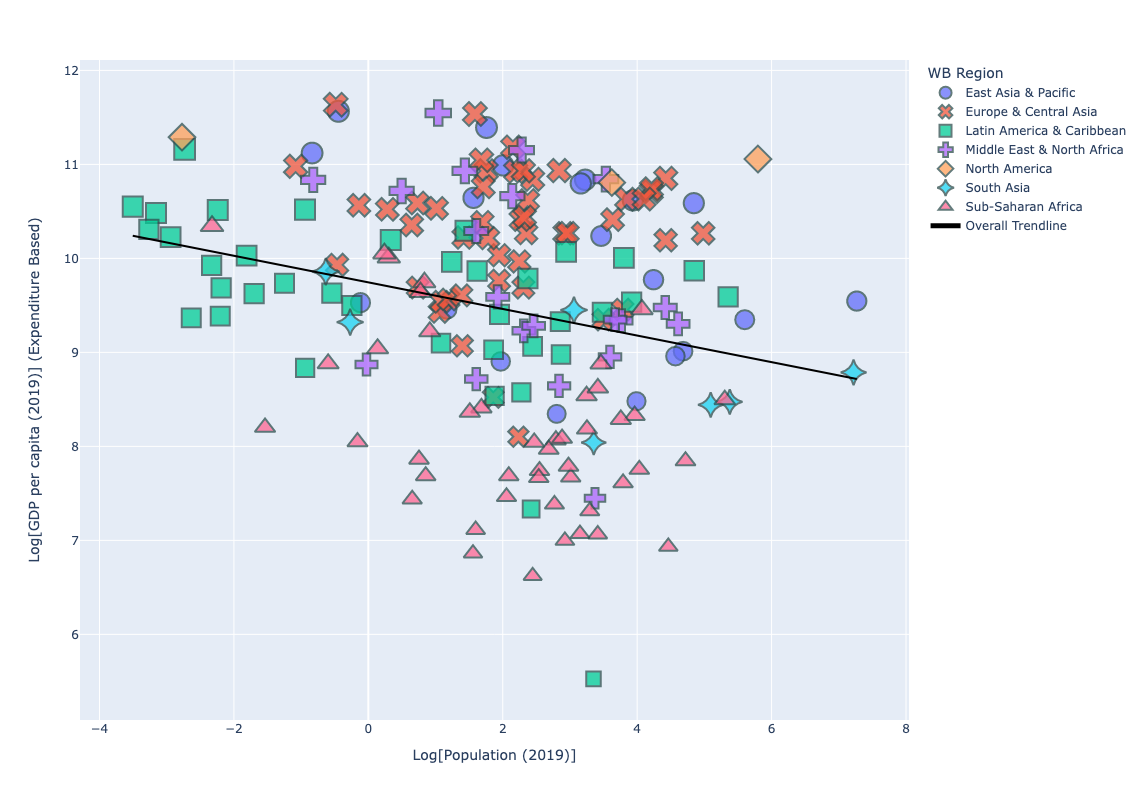

In [155]:
fig.update_traces(marker=dict(#size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

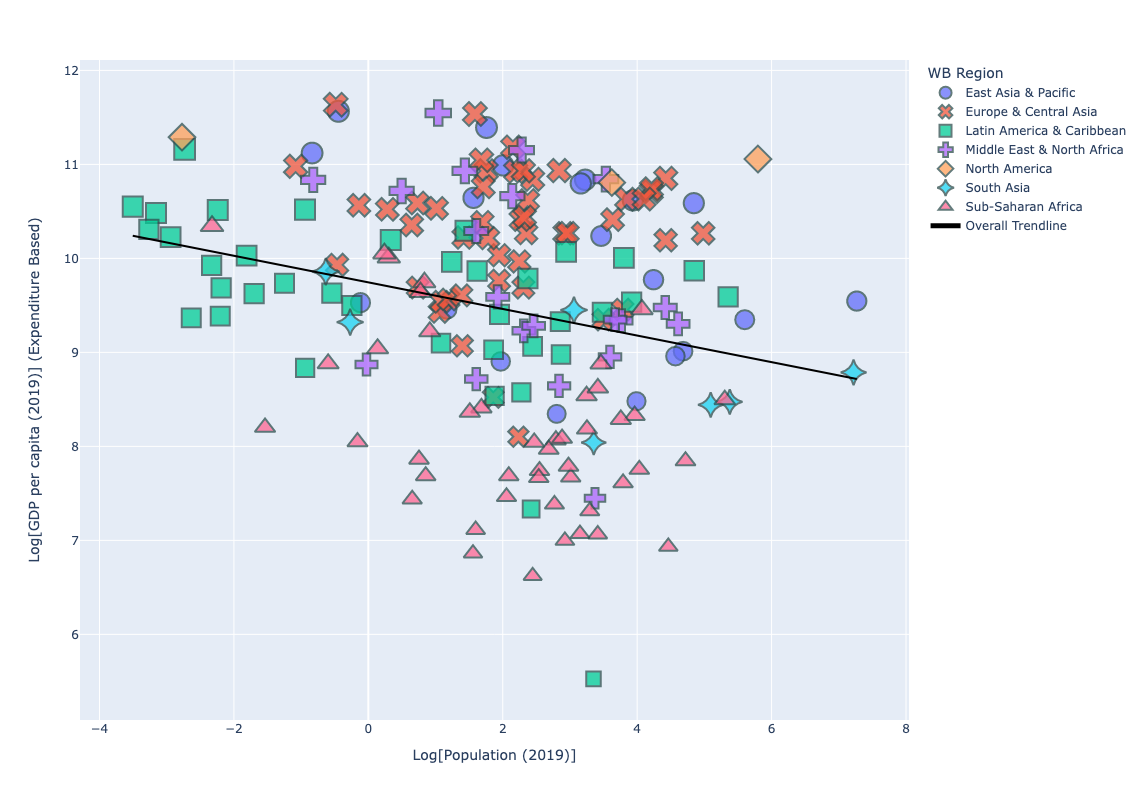

In [156]:
fig.show()

# Increase width of trend line

In [157]:
tr_line=[]
for  k, trace  in enumerate(fig.data):
        if trace.mode is not None and trace.mode == 'lines':
            tr_line.append(k)
print(tr_line)
for id in tr_line:
    fig.data[id].update(line_width=3)

[7]


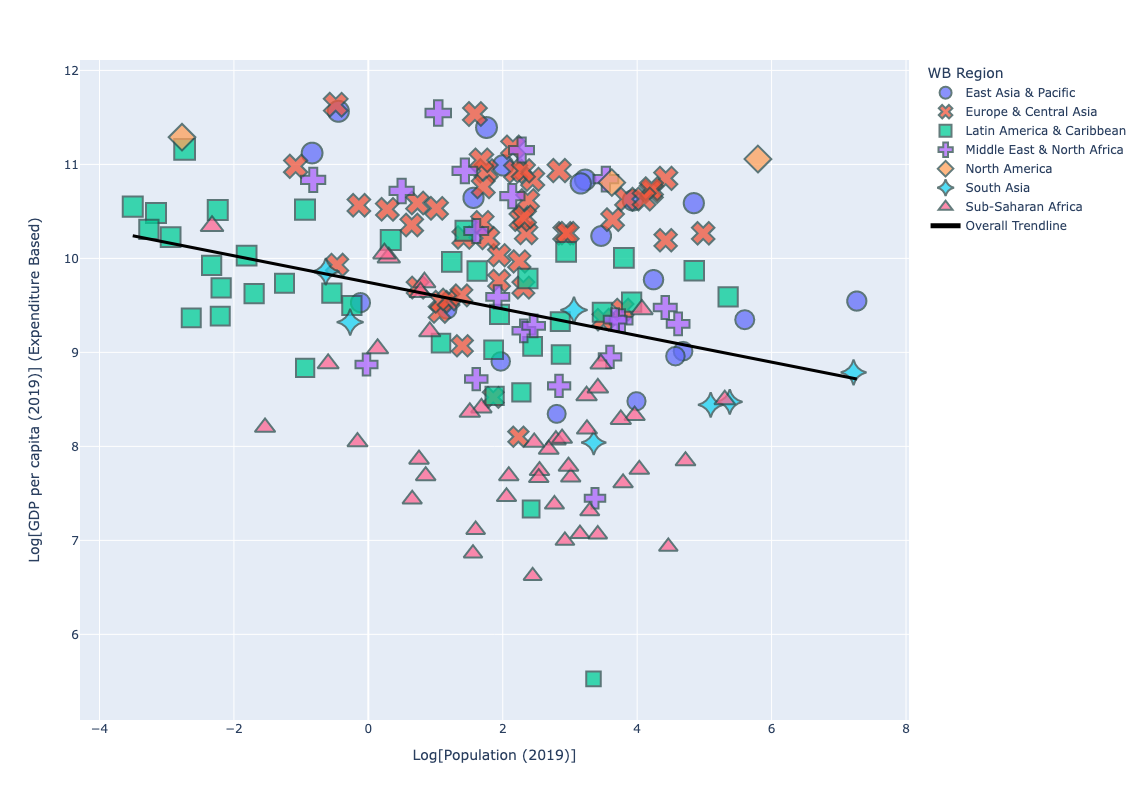

In [158]:
fig.show()

# Change legend position

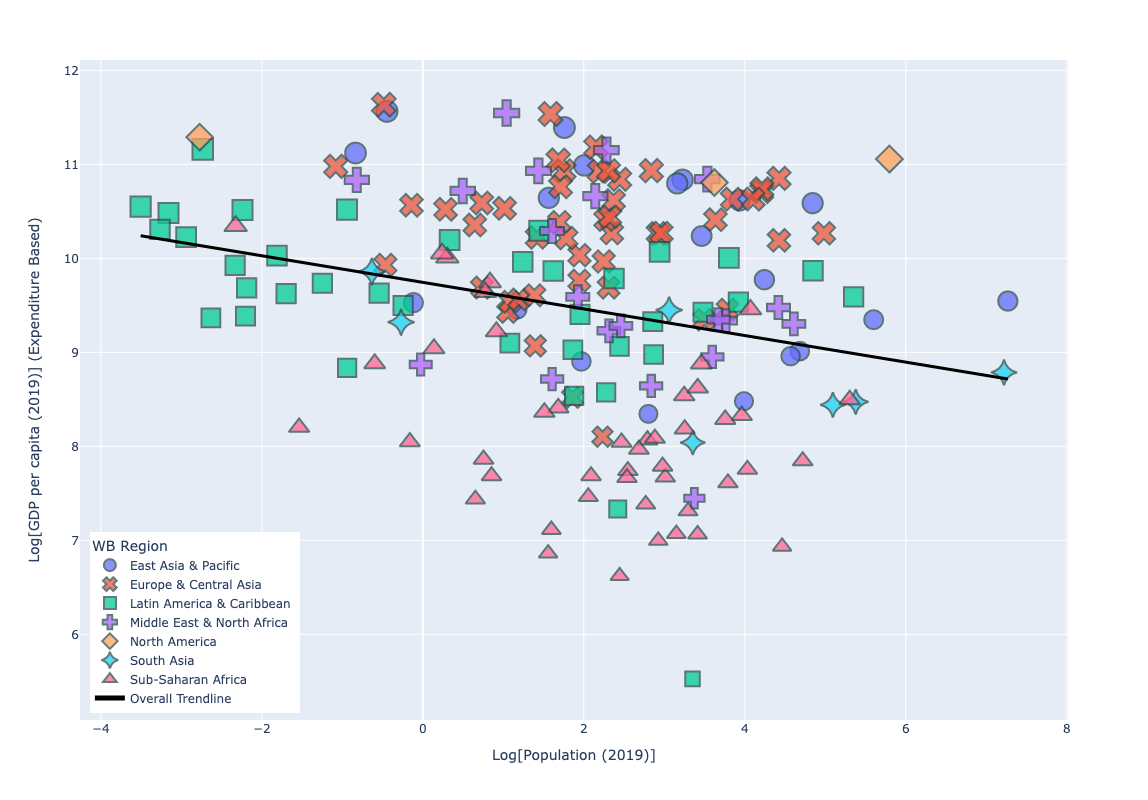

In [164]:
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.01,
    xanchor="left",
    x=0.01
))

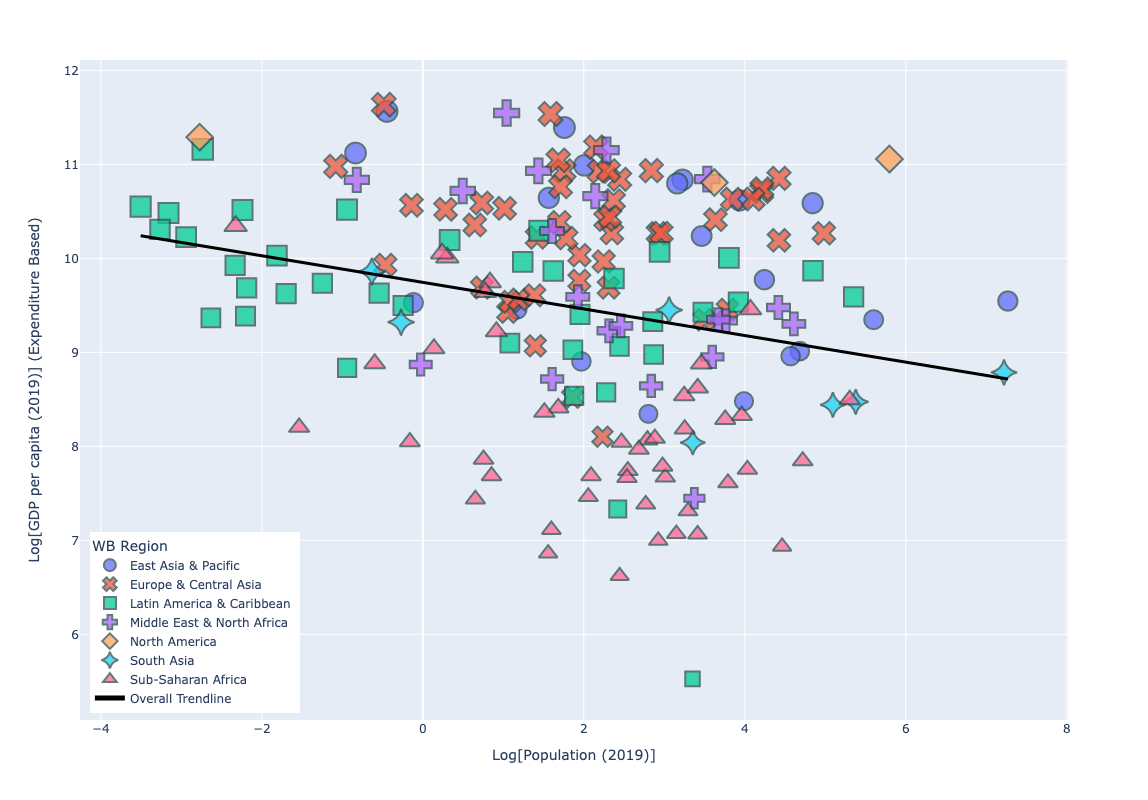

In [165]:
fig.show()

# To save the figure use in your desired format
```python
fig.write_image(pathgraphs + "fig1.pdf")
fig.write_image(pathgraphs + "fig1.png")
fig.write_image(pathgraphs + "fig1.jpg")
```

In [166]:
fig.write_image(pathgraphs + "ln-gdp-pc-pop-plotly-pwt.pdf", height=1000, width=1500, scale=4)

## We can access the results of the regression in **plotly express**

In [167]:
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     11.32
Date:                Sat, 22 Oct 2022   Prob (F-statistic):           0.000936
Time:                        13:48:36   Log-Likelihood:                -285.70
No. Observations:                 181   AIC:                             575.4
Df Residuals:                     179   BIC:                             581.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7442      0.120     81.183      0.000       9.507       9.981
x1            -0.1414      0.042     -3.365      0.001      -0.224      -0.058
==============================================================================
Omnibus:                        6.829   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.872
Skew:                          -0.443   Prob(JB):                       0.0322
Kurtosis:                       2.646   Cond. No.                         4.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Maps with
<center><a href="https://seaborn.pydata.org/index.html#"><img src="https://raw.githubusercontent.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/main/pics/logo-wide-lightbg.svg" alt="seaborn" width=300/></a></center>

# To create maps we need to obtain *geographical information*

There are various types of data in **Geographic Information Systems (GIS)**

* Location of cities, resources, etc. (point data)

* Shape of rivers, borders, countries, etc. (shape data)

* Numerical data for locations (elevation, temperature, number of people)

## Download Country boundary data from [Natural Earth](http://www.naturalearthdata.com/)

In [168]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'}

url = 'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip'
r = requests.get(url, headers=headers)
countries = gp.read_file(io.BytesIO(r.content))

## The boundary file is a **geopandas** dataframe

Text(0.5, 1.0, 'WGS84 (lat/lon)')

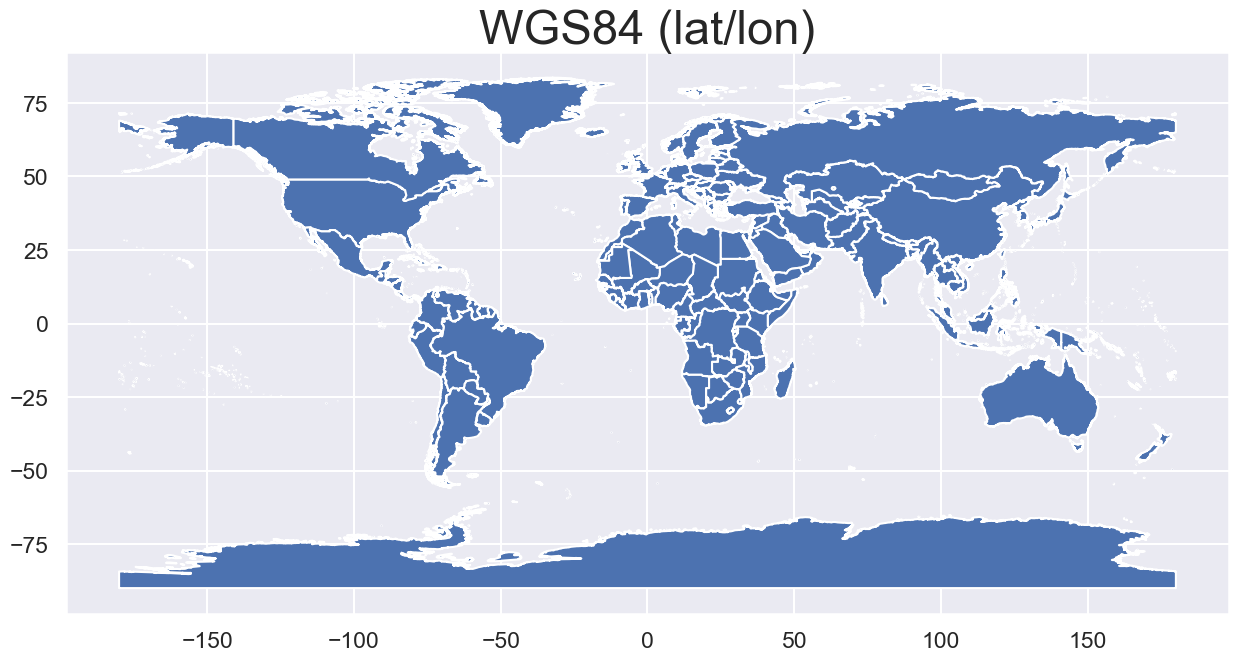

In [169]:
fig, ax = plt.subplots(figsize=(15,10))
countries.plot(ax=ax)
ax.set_title("WGS84 (lat/lon)", fontdict={'fontsize':34})

## Merge with other data and plot

In [170]:
dffig2 = countries.merge(dffig, left_on='ADM0_A3', right_on='iso3c')

Text(0.5, 1.0, 'WGS84 (lat/lon)')

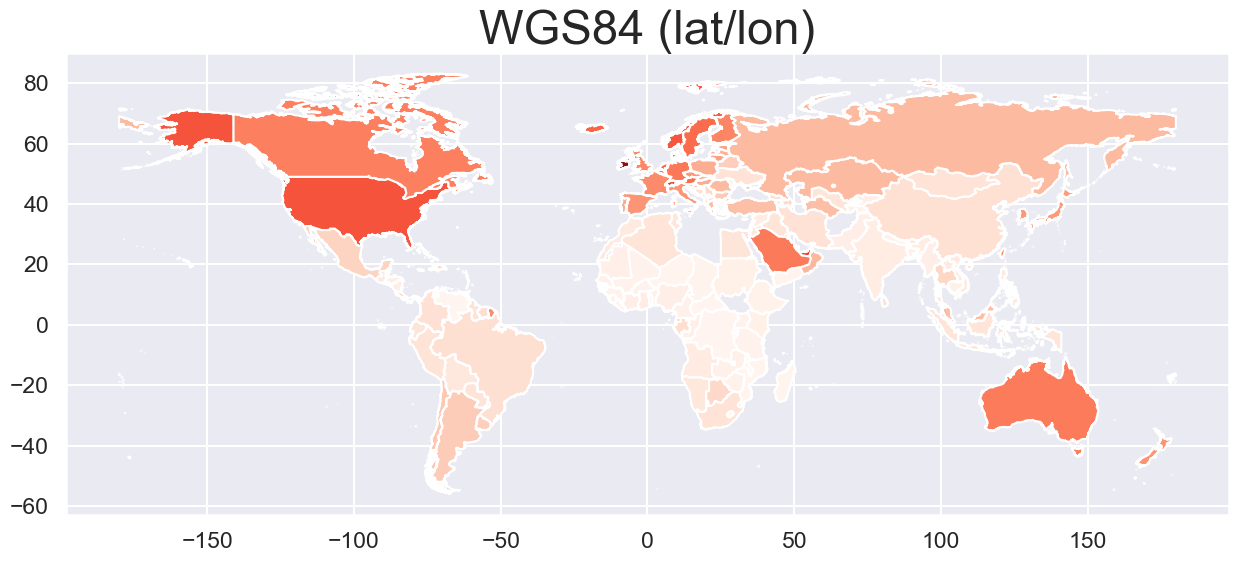

In [172]:
fig, ax = plt.subplots(figsize=(15,10))
dffig2.plot(column='gdp_pc_e', ax=ax, cmap='Reds')
ax.set_title("WGS84 (lat/lon)", fontdict={'fontsize':34})

# Maps with [geoplot](https://residentmario.github.io/geoplot/)

In [173]:
url = 'https://residentmario.github.io/geoplot/'
IFrame(url, width=800, height=400)

# Plot Countries

<GeoAxesSubplot:>

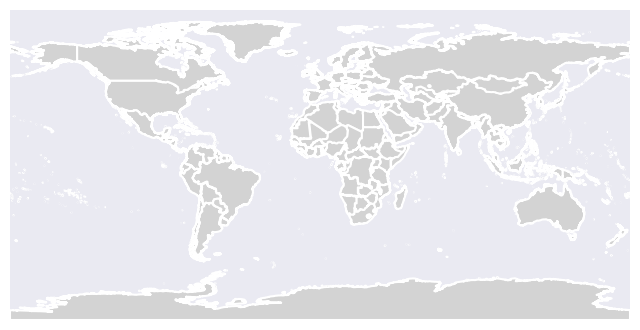

In [174]:
gplt.polyplot(
    countries, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
    edgecolor='white', facecolor='lightgray',
    rasterized=True,
    extent=[-180, -90, 180, 90],
)

# Plot Data

<GeoAxesSubplot:>

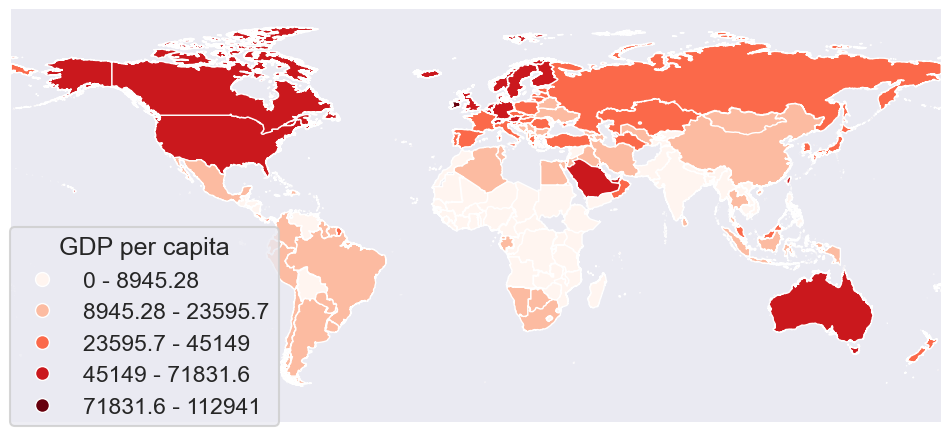

In [175]:
gplt.choropleth(
        dffig2, hue='gdp_pc_e', projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor='white', linewidth=1,
        cmap='Reds', legend=True,
        scheme='FisherJenks',
        legend_kwargs={'bbox_to_anchor':(0.3, 0.5),
                       'frameon': True,
                       'title':'GDP per capita',
                       },
        figsize=(12,8),
        rasterized=True,
    )

# Data and Borders

<GeoAxesSubplot:>

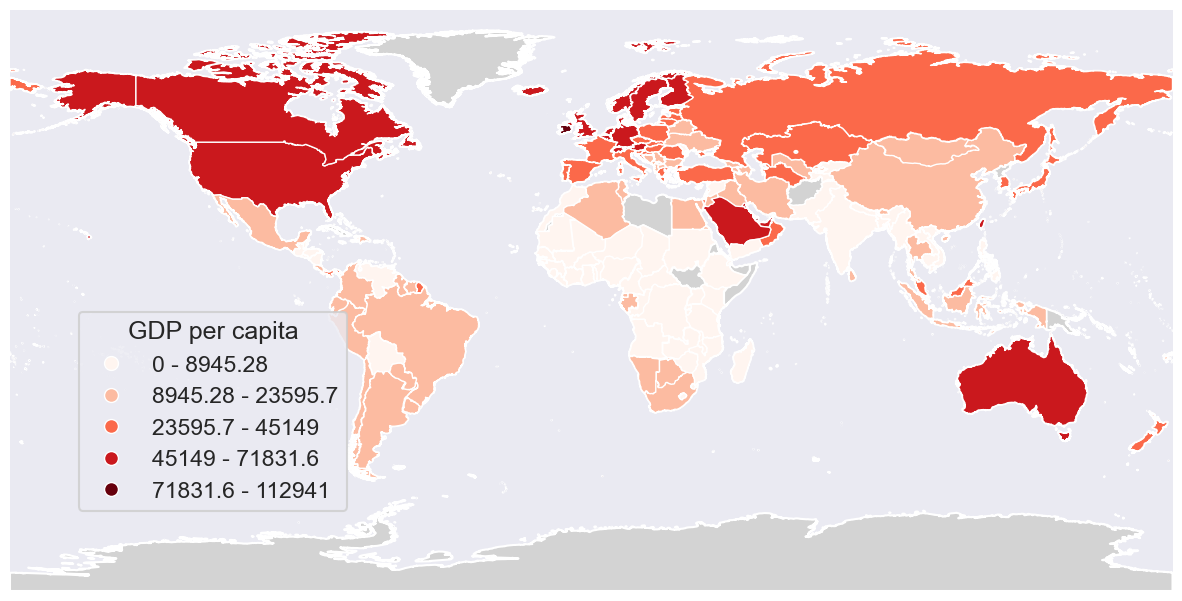

In [176]:
ax = gplt.choropleth(
        dffig2, hue='gdp_pc_e', projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor='white', linewidth=1,
        cmap='Reds', legend=True,
        scheme='FisherJenks',
        legend_kwargs={'bbox_to_anchor':(0.3, 0.5),
                       'frameon': True,
                       'title':'GDP per capita',
                       },
        figsize=(15,10),
        rasterized=True,
    )
gplt.polyplot(
    countries, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
    edgecolor='white', facecolor='lightgray',
    ax=ax,
    rasterized=True,
    extent=[-180, -90, 180, 90],
)

# Use a nice function

In [177]:
# Functions for plotting
def center_wrap(text, cwidth=32, **kw):
    '''Center Text (to be used in legend)'''
    lines = text
    #lines = textwrap.wrap(text, **kw)
    return "\n".join(line.center(cwidth) for line in lines)

def MyChloropleth(mydf, myfile='fig', myvar='gdp_pc_e',
                  mylegend='GDP per capita',
                  k=5,
                  extent=[-180, -90, 180, 90],
                  bbox_to_anchor=(0.2, 0.5),
                  edgecolor='white', facecolor='lightgray',
                  scheme='FisherJenks',
                  save=True,
                  percent=False,
                  **kwargs):
    # Chloropleth
    # Color scheme
    if scheme=='EqualInterval':
        scheme = mc.EqualInterval(mydf[myvar], k=k)
    elif scheme=='Quantiles':
        scheme = mc.Quantiles(mydf[myvar], k=k)
    elif scheme=='BoxPlot':
        scheme = mc.BoxPlot(mydf[myvar], k=k)
    elif scheme=='FisherJenks':
        scheme = mc.FisherJenks(mydf[myvar], k=k)
    elif scheme=='FisherJenksSampled':
        scheme = mc.FisherJenksSampled(mydf[myvar], k=k)
    elif scheme=='HeadTailBreaks':
        scheme = mc.HeadTailBreaks(mydf[myvar], k=k)
    elif scheme=='JenksCaspall':
        scheme = mc.JenksCaspall(mydf[myvar], k=k)
    elif scheme=='JenksCaspallForced':
        scheme = mc.JenksCaspallForced(mydf[myvar], k=k)
    elif scheme=='JenksCaspallSampled':
        scheme = mc.JenksCaspallSampled(mydf[myvar], k=k)
    elif scheme=='KClassifiers':
        scheme = mc.KClassifiers(mydf[myvar], k=k)
    # Format legend
    upper_bounds = scheme.bins
    # get and format all bounds
    bounds = []
    for index, upper_bound in enumerate(upper_bounds):
        if index == 0:
            lower_bound = mydf[myvar].min()
        else:
            lower_bound = upper_bounds[index-1]
        # format the numerical legend here
        if percent:
            bound = f'{lower_bound:.0%} - {upper_bound:.0%}'
        else:
            bound = f'{float(lower_bound):,.0f} - {float(upper_bound):,.0f}'
        bounds.append(bound)
    legend_labels = bounds
    #Plot
    ax = gplt.choropleth(
        mydf, hue=myvar, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor='white', linewidth=1,
        cmap='Reds', legend=True,
        scheme=scheme,
        legend_kwargs={'bbox_to_anchor': bbox_to_anchor,
                       'frameon': True,
                       'title':mylegend,
                       },
        legend_labels = legend_labels,
        figsize=(24, 16),
        rasterized=True,
    )
    gplt.polyplot(
        countries, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
        edgecolor=edgecolor, facecolor=facecolor,
        ax=ax,
        rasterized=True,
        extent=extent,
    )
    if save:
        plt.savefig(pathgraphs + myfile + '.pdf', dpi=300, bbox_inches='tight')
        plt.savefig(pathgraphs + myfile + '.png', dpi=300, bbox_inches='tight')
    pass

In [ ]:
mylegend = center_wrap(["GDP per capita in " + str(year), "(Expenditure Based)"], cwidth=32, width=32)
MyChloropleth(dffig2, myfile='fig-gdp-pc-' + str(year) + '-pwt', myvar='gdp_pc_e', mylegend=mylegend, k=10, scheme='Quantiles', save=True)

# Quick and Easy Maps with
<center><a href="https://plotly.com/python/"><img src="https://raw.githubusercontent.com/SMU-Econ-Growth/EconGrowthUG-Notebooks/main/pics/plot_ly-ar21.svg" alt="plotly express" width=300/></a></center>

In [179]:
url = 'https://plotly.com/python/maps/'
IFrame(url, width=800, height=400)

# Map using classes (similar to **geoplot**)

## Choose a classifier and classify the data

In [180]:
scheme = mc.Quantiles(dffig2['gdp_pc_e'], k=5)
classifier = mc.Quantiles.make(k=5, rolling=True)
dffig2['gdp_pc_q'] = classifier(dffig2['gdp_pc'])
dffig2['gdp_pc_qc'] = dffig2['gdp_pc_q'].apply(lambda x: scheme.get_legend_classes()[x].replace('[   ', '[').replace('( ', '('))
#dffig2[['gdp_pc', 'gdp_pc_q', 'gdp_pc_qc']].sort_values('gdp_pc_q', ascending=True)

KeyError: 'gdp_pc'

In [ ]:
fig = px.choropleth(dffig2.sort_values('gdp_pc_q', ascending=True), 
                    locations="iso3c",
                    color="gdp_pc_qc",
                    hover_name='name',
                    hover_data=['iso3c', 'ln_pop'],
                    labels={
                        "gdp_pc_qc": "GDP per capita (" + str(year) + ")",
                    },
                    color_discrete_sequence=px.colors.sequential.Reds,
                    height=600, 
                    width=1000,
                   )
# Change legend position
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.15,
    xanchor="left",
    x=0.05
))

In [ ]:
fig.show()

In [ ]:
fig = px.choropleth(dffig2.sort_values('gdp_pc_q', ascending=True), 
                    locations="iso3c",
                    color="gdp_pc_qc",
                    hover_name='name',
                    hover_data=['iso3c', 'gdp_pc' ,'ln_pop'],
                    labels={
                        "gdp_pc_qc": "GDP per capita (" + str(year) + ")",
                        "gdp_pc": "GDP per capita (" + str(year) + ")",
                        'iso3c':'ISO code',
                        "ln_pop": "Log[Population (" + str(year) + ")]",
                    },
                    color_discrete_sequence=px.colors.sequential.Blues,
                    height=600, 
                    width=1000,
                   )
# Change legend position
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.15,
    xanchor="left",
    x=0.05
))

In [ ]:
fig.show()

In [ ]:
fig = px.choropleth(dffig, 
                    locations="iso3c",
                    color="ln_gdp_pc",
                    hover_name='name',
                    hover_data=['iso3c', 'ln_pop'],
                    labels={
                        "ln_gdp_pc": "Log[GDP per capita (" + str(year) + ")]",
                    },
                    #color_continuous_scale=px.colors.sequential.Plasma,
                    color_continuous_scale="Reds",
                    height=600, 
                    width=1100,
                   )

In [ ]:
fig.show()

In [ ]:
fig.update_layout(coloraxis_colorbar=dict(
    orientation = 'h',
    yanchor="bottom", 
    xanchor="left", 
    y=-.2,
    x=0,
))
fig.update_coloraxes(colorbar_title_side='top')

In [ ]:
fig.show()

In [ ]:
# Change legend position
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="center",
    x=0.01,
    orientation='h',
))

In [ ]:
fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = dffig['iso3c'],
    z = dffig['gdp_pc'],
    text = dffig['name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP pc',
    )                  
)
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    margin=dict(
        l=5,
        r=5,
        b=10,
        t=10,
        pad=1
    ),
    paper_bgcolor="LightSteelBlue",
)

In [ ]:
fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = dffig['iso3c'],
    z = dffig['gdp_pc'],
    text = dffig['name'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP per capita',
    )                  
)
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=1,
        r=1,
        b=1,
        t=1,
        pad=.1
    ),
    paper_bgcolor="LightSteelBlue",
)
# Change legend position
cb = fig.data[0].colorbar
cb.orientation = 'h'
cb.yanchor = 'bottom'
cb.xanchor = 'center'
cb.y = .1
cb.title.side = 'top'

In [ ]:
fig.show()

# <center>Exercises</center>

<div class="alert alert-block alert-warning">
    <b>Exercise 1:</b> Get WDI data on <b>patent applications by residents and non-residents in each country</b>. Create a new variable that shows the total patents for each country.
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Using the <code>my_xy_plot</code> function plot the relation between <b>GDP per capita</b> and <b>total patents</b> in the years 1990, 1995, 2000, 2010, 2020.
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> Using the <code>my_xy_line_plot</code> function plot the evolution of <b>GDP per capita</b> and <b>total patents</b> by income groups and regions (separate figures).
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 4:</b> Plot the relation between patenting activity by <b>residents and non-residents</b> in the year 2015. Make sure to show the 45 degree line so you can see how similar they are.
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 5:</b> Create a static and a dynamic map for patenting activity in the year 2015 across the world. 
</div>

<div class="alert alert-block alert-warning">
<b>Exercise 6:</b> Explore the relation between economic development as measured by Log[GDP per capita] and patenting activity. Show the relation for residents, non-residents, and total, all in one nice looking table. Also, produce a few nice looking figures.
</div>

Notebook written by [Ömer Özak](http://omerozak.com) for his students in Economics at [Southern Methodist University](http://www.smu.edu). Feel free to use, distribute, or contribute.

[<center><img src="https://github.com/measuring-culture/Expanding-Measurement-Culture-Facebook-JRSI/blob/main/pics/SMUlogowWordmarkRB.jpg?raw=true" width="250"></center>](http://omerozak.com)